# Projet Kolkata Restaurant #

Plusieurs joueurs (*n*), qui habitent dans le même quartier, souhaitent se rendre dans un des *k* restaurants du quartier. Une fois que leur choix est effectué, les joueurs se rendent dans le restaurant choisi.
La règle est alors la suivante :
* si un joueur est seul dans un restaurant, un plat lui est servi (gain = 1)
* si plusieurs joueurs se trouvent dans un même restaurant, un joueur est choisi au hasard (de manière uniforme parmi tous les joueurs présents dans ce restaurant), et est servi (gain = 1). Les autres joueurs ne sont pas servis (gain = 0).
Le jeu se déroule sur plusieurs itérations (*m*, fixé à l'avance).

## Une partie avec des stratégies de base

Dans le cadre de ce projet, nous vous demandons tout d'abord de partir du squelette et de la carte proposée. Cette carte comprend 6 restaurants, représentés par des pièces avec une table au fond, avec 20 joueurs (10 hommes, 10 femmes).

Elle est représentée ci-dessous:

![Exemple de carte](../screen_ex_kolkata.png)

Sur cette carte, fournie dans le squelette de code, les tables sont des objets ramassables, et elles représentent la case à atteindre pour les agents. Toutefois,  les joueurs ne les ramassent pas lorsqu'ils arrivent à destination. (Si cela vous amuse, vous pouvez faire en sorte que les joueurs s'arrêtent sur des cases différentes dans le restaurant, mais ce n'est pas important). Les joueurs sont placés au hasard sur la carte, et ils ne font que se déplacer au hasard. Ils ont donc peu de chance d'arriver à leur restaurant. Mais vous aller améliorer cela!


Le boucle principale devra être la suivante :
* à chaque itération, les joueurs apparaissent au hasard à une des positions de la carte;
* chaque joueur choisit un restaurant où se rendre, selon la stratégie qui est la sienne;
* chaque joueur se rend au restaurant de son choix, en suivant le plus court chemin jusqu'au restaurant (via l'exécution de l'algorithme A*);  
* lorsque tous les joueurs sont arrivés à destination, les joueurs obtiennent leur gain, et prennent connaissance des taux de remplissage de chaque restaurant.

**Note:** *Les collisions ne sont pas prises en compte (i.e. les joueurs peuvent partager la même case).*

Lorsque les *m* itérations sont réalisées, vous donnerez les scores réalisés par chaque joueur.
Vous pourrez donner les métriques suivantes:
* le score moyen de chaque joueur (ou stratégie)
* le produit des scores obtenus par chaque joueur utilisant une stratégie


Les deux stratégies de base qui doivent être implémentées pour cette version de base sont :
* une stratégie aléatoire uniforme
* une stratégie tétue (toujours choisir le même restaurant)

### Stratégie aléatoire uniforme et têtu

La stratégie aléatoire uniforme est la suivante : 
* Chaque joueur devra choisir le restaurant dans lequel il veut aller de façon aléatoire et uniforme.

La stratégie têtu est la suivante : 
* Chaque joueur devra toujours le même restaurant. C'est à dire que dès que le premier choix du restaurant a été fait, le joueur ira toujours dans celui ci à chaque tour.

Voyons donc le score obtenue en moyenne pour chaque stratégie sur 10 itérations:

In [1]:
import kalkota_restaurants as kolkata

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
it = 10
score, produit, scoreJoueur = kolkata.main(['uniforme','tetu'], it)
print("Nombre d'itérations : ", it)
print("Score moyen: ", score)
print("Produit des scores pour chaque stratégie: ", produit)
print("Score des joueurs : ", scoreJoueur)

Occupation des restaurants à l'itération  0 : [[5, 7, 9], [0, 2, 4], [6], [], [3], [1, 8]]
Occupation des restaurants à l'itération  1 : [[5, 9], [0, 2, 4], [3, 6], [7], [], [1, 8]]
Occupation des restaurants à l'itération  2 : [[9], [0, 2], [6, 7], [4], [5], [1, 3, 8]]
Occupation des restaurants à l'itération  3 : [[9], [0, 2, 7], [6], [3, 4, 5], [], [1, 8]]
Occupation des restaurants à l'itération  4 : [[9], [0, 2, 5, 6], [4], [3], [], [1, 7, 8]]
Occupation des restaurants à l'itération  5 : [[9], [0, 2, 3, 5], [6, 7], [], [], [1, 4, 8]]
Occupation des restaurants à l'itération  6 : [[5, 9], [0, 2], [], [4], [6], [1, 3, 7, 8]]
Occupation des restaurants à l'itération  7 : [[6, 9], [0, 2, 3], [4], [5], [], [1, 7, 8]]
Occupation des restaurants à l'itération  8 : [[5, 7, 9], [0, 2, 6], [3], [4], [], [1, 8]]
Occupation des restaurants à l'itération  9 : [[6, 9], [0, 2, 4, 7], [], [5], [], [1, 3, 8]]
Taux de fréquentation :  {0: {0: 3, 1: 3, 2: 1, 3: 0, 4: 1, 5: 2}, 1: {0: 2, 1: 3, 2: 2,

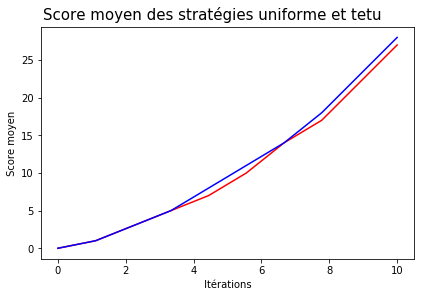

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab

uniforme = score['uniforme']
tetu = score['tetu']
p = np.linspace(0, it, it)
plt.plot(p, uniforme, color='red')
plt.plot(p, tetu, color = 'blue')
legende = "Score moyen des stratégies uniforme et tetu"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.xlabel(' Itérations ')
plt.ylabel(' Score moyen ')
plt.tight_layout()

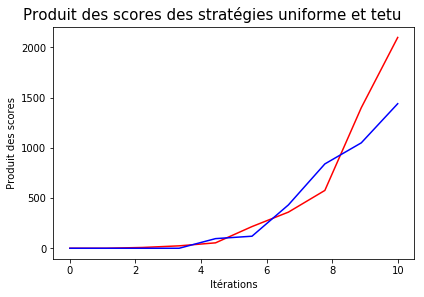

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab

uniforme = produit['uniforme']
tetu = produit['tetu']
p = np.linspace(0, it, it)
plt.plot(p, uniforme, color='red')
plt.plot(p, tetu, color = 'blue')
legende = "Produit des scores des stratégies uniforme et tetu"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.xlabel(' Itérations ')
plt.ylabel(' Produit des scores ')
plt.tight_layout()

Pour avoir la score moyen, j'ai, à chaque itération, effectuée la somme des gains cumulés de chaque joueur selon la stratégie et diviser par le nombre de joueur. On observe que le score moyen des 2 stratégies, *uniforme* et *têtu* se croisent. Mais lorsqu'on regarde le produit des scores, on observe qu'à chaque itération, les joueurs utilisant la stratégie *uniforme* ont tendance à avoir un meilleur score comparé à ceux qui utilisent la stratégie *têtu*.

## Imaginez différentes stratégies

Pour cette partie, j'ai choisi d'implémenter 1 stratégie qui est la suivante : 
* La stratégie *"Vide ou Presque"* : 
    - Dans cette stratégie, étant donné que les joueurs ont accès au taux de fréquentation des restaurants, chaque joueur utilisant cette stratégie devra donc choisir le  restaurant ayant eu le moins de fréquentation au tour précédent pour augmenter leur chance d'avoir un gain en plus.

## Expérimentations

In [5]:
it = 10
score, produit, scoreJoueurs = kolkata.main(['uniforme','tetu','videoupresque'], it)
print("Nombre d'itérations : ", it)
print("Score moyen: ", score)
print("Produit des scores : ",produit)
print("Score des joueurs : ", scoreJoueurs)

Occupation des restaurants à l'itération  0 : [[0], [1], [3], [4, 5], [8, 9], [2, 6, 7]]
Occupation des restaurants à l'itération  1 : [[0, 2, 3, 7, 8, 9], [1], [], [5], [4], [6]]
Occupation des restaurants à l'itération  2 : [[8], [1], [0, 2, 3, 9], [5, 7], [4], [6]]
Occupation des restaurants à l'itération  3 : [[0, 2, 3, 4], [1], [9], [5, 7, 8], [], [6]]
Occupation des restaurants à l'itération  4 : [[], [1], [], [5], [0, 2, 3, 8], [4, 6, 7, 9]]
Occupation des restaurants à l'itération  5 : [[0, 2, 3, 4, 9], [1], [8], [5, 7], [], [6]]
Occupation des restaurants à l'itération  6 : [[], [1, 4, 7, 8], [], [5], [0, 2, 3, 9], [6]]
Occupation des restaurants à l'itération  7 : [[0, 2, 3, 7, 8], [1], [4, 9], [5], [], [6]]
Occupation des restaurants à l'itération  8 : [[], [1], [], [4, 5, 7], [0, 2, 3, 8], [6, 9]]
Occupation des restaurants à l'itération  9 : [[0, 2, 3, 7], [1, 8], [4], [5, 9], [], [6]]
Taux de fréquentation :  {0: {0: 1, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}, 1: {0: 6, 1: 1, 2: 0,

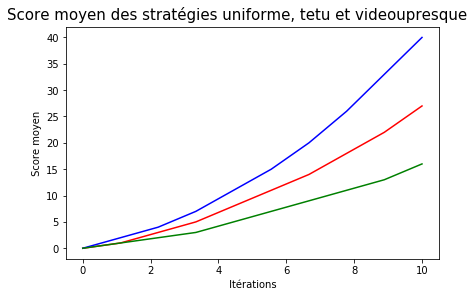

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab

uniforme = score['uniforme']
tetu = score['tetu']
vop = score['videoupresque']
p = np.linspace(0, it, it)
plt.plot(p, uniforme, color='red')
plt.plot(p, tetu, color = 'blue')
plt.plot(p, vop, color='green')
legende = "Score moyen des stratégies uniforme, tetu et videoupresque"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.xlabel(' Itérations ')
plt.ylabel(' Score moyen ')
plt.tight_layout()

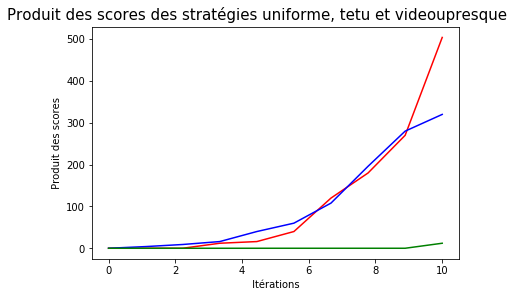

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab

uniforme = produit['uniforme']
tetu = produit['tetu']
vop = produit['videoupresque']
p = np.linspace(0, it, it)
plt.plot(p, uniforme, color='red')
plt.plot(p, tetu, color = 'blue')
plt.plot(p, vop, color='green')
legende = "Produit des scores des stratégies uniforme, tetu et videoupresque"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.xlabel(' Itérations ')
plt.ylabel(' Produit des scores ')
plt.tight_layout()

Pour les 2 stratégies de base, on observe à peu près les mêmes résultats qu'on avait obtenus précédemment.
On observe que finalement la stratégie *Vide ou presque* n'est pas vraiment une bonne stratégie. En effet, même si les joueurs utilisant une stratégie *têtu* choisissent toujours le même restaurant, cela pourrait augmenter la chance des joueurs utilisant la stratégie *Vide ou presque* d'avoir un gain en plus mais étant donnée que les joueur utilisantla stratégie *uniforme* choisissent eur restaurant de manière aléatoire, ce stratégie n'est finalement pas avantageuse. 

(PS: Compte tenu de la situation, je n'ai pas pu avancer sérieusement sur ce projet qui est très interessant. Néanmoins j'ai pu quand même trouver une stratégie à tester avec les stratégies de base, même si celle ci n'est finalement pas meilleur que les autres). 